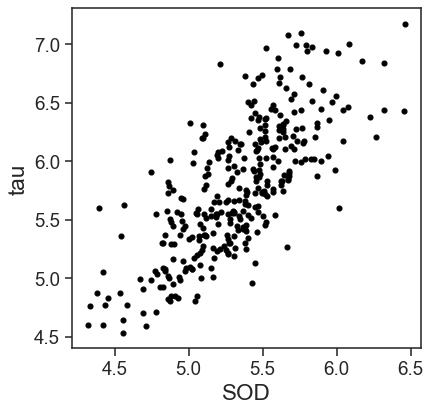

In [21]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb 15 17:47:44 2019

@author: Jie Zhang，微信公众号【EasyShu】，本代码源自《Python数据可视化之美》
"""
import pandas as pd
import numpy as np
from plotnine import *
#from plotnine.data import *
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Facet_Data.csv")

#-------------------------Matplotlib----------------------------
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5,
                rc={'font.size': 12,
                    'axes.labelsize': 18, 'legend.fontsize':15,
                    'xtick.labelsize': 15,'ytick.labelsize': 15})

fig = plt.figure(figsize=(5,5),dpi =90)
plt.xlabel('SOD')
plt.ylabel('tau')
#plt.title('requests')
plt.scatter(df['SOD'], df['tau'], c='black', s=15,  marker='o')
# c='red'定义为红色，alpha是透明度，marker是画的样式 ,edgecolors="black"
#plt.grid(True)
#plt.legend(loc='best')
plt.show()
#fig.savefig("scatter_plt.pdf")

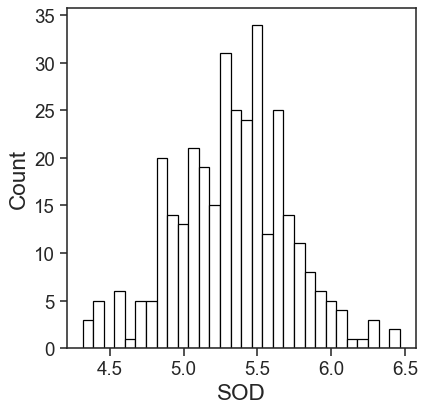

In [22]:
plt.rcParams["patch.force_edgecolor"] = True
fig = plt.figure(figsize=(5,5),dpi =90)
plt.xlabel('SOD')
plt.ylabel('Count')
n, bins, patches = plt.hist(df['SOD'], 30, density=False, facecolor='w',edgecolor="k")#,alpha=1
#fig.savefig("hist_plt.pdf")

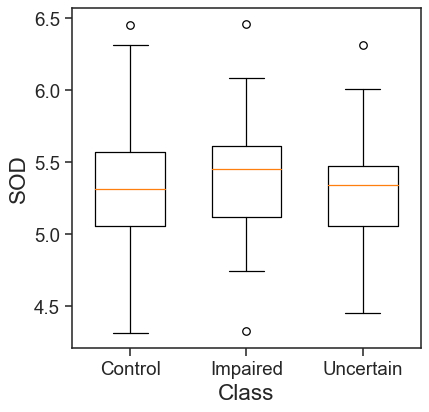

In [23]:
labels=np.unique( df['Class'])
all_data = [df[df['Class']==label]['SOD'] for label in labels]

fig = plt.figure(figsize=(5,5),dpi =90)
plt.xlabel('Class')
plt.ylabel('SOD')

plt.boxplot(all_data,
            widths =0.6,
            notch=False,
            #sym='.',
            #vert=True,
            labels=labels)
plt.show()
#fig.savefig("boxplot_plt.pdf")

<Figure size 360x360 with 0 Axes>

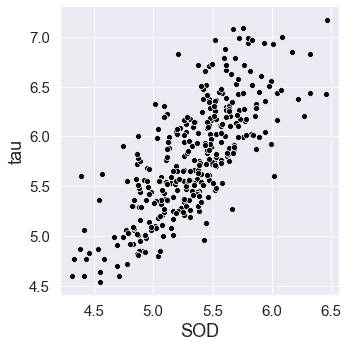

In [24]:
#-------------------------Seaborn----------------------------
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5,
                rc={'font.size': 12,

                    'axes.labelsize': 18, 'legend.fontsize':15,
                    'xtick.labelsize': 15,'ytick.labelsize': 15})
fig = plt.figure(figsize=(5,5))
scatter_sns=sns.relplot(x="SOD", y="tau", data=df,color='k')
scatter_sns.savefig('scatter_sns.pdf')

Text(0, 0.5, 'Count')

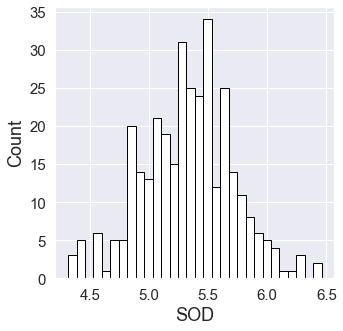

In [25]:
plt.rcParams["patch.force_edgecolor"] = True
fig = plt.figure(figsize=(5,5))
hist_sns=sns.distplot(df['SOD'], kde=False,bins=30,
                      hist_kws=dict(edgecolor="k", facecolor="w",linewidth=1,alpha=1))
plt.ylabel("Count")
#fig.savefig('hist_sns.pdf')

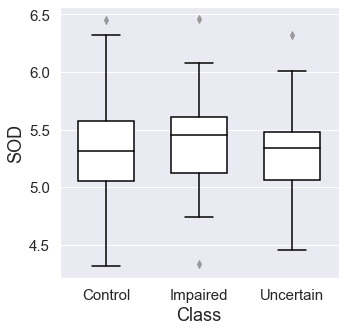

In [26]:
fig = plt.figure(figsize=(5,5))
box_sns=sns.boxplot(x="Class", y="SOD", data=df,
                    width =0.6,palette=['w'])
for i,box in enumerate(box_sns.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
    for j in range(6*i,6*(i+1)):
         box_sns.lines[j].set_color('black')
#fig.savefig('box_sns.pdf')

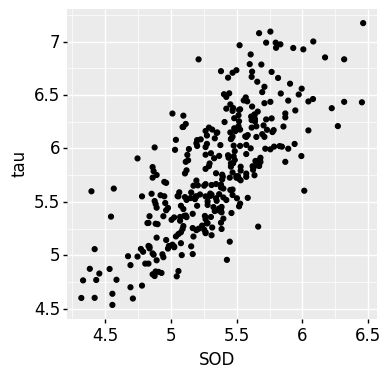

In [27]:
#-------------------------plotnine----------------------------
p1=(ggplot(df, aes(x='SOD',y='tau')) +
  geom_point()+
  theme(text=element_text(size=12,colour = "black"),
        aspect_ratio =1,
        dpi=100,
       figure_size=(4,4))) #shape=21,color="black",fill="red",size=3,stroke=0.1
print(p1)
#p1.save("scatter_plotnine.pdf")

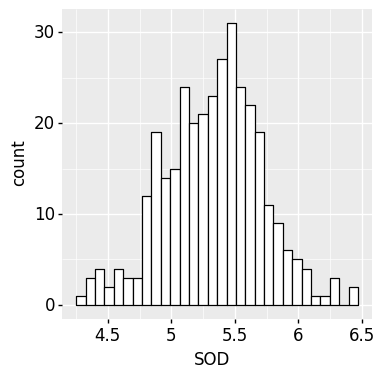

In [28]:
p2=(ggplot(df, aes(x='SOD')) +
  geom_histogram(bins=30,colour="black",fill="white")+
  theme(text=element_text(size=12,colour = "black"),
        aspect_ratio =1,
        dpi=100,
       figure_size=(4,4)))
print(p2)
#p2.save("hist_plotnine.pdf")

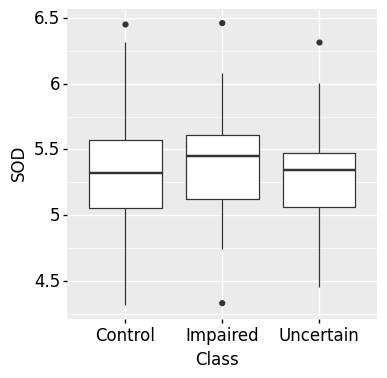

In [29]:
#df['Class']=df['Class'].astype(int)
p3=(ggplot(df, aes(x='Class',y='SOD'))+
  geom_boxplot(show_legend=False)+
  theme(text=element_text(size=12,colour = "black"),
        aspect_ratio =1,
        dpi=100,
       figure_size=(4,4)))
print(p3)
#p3.save("boxplot_plotnine.pdf")